# Data Exploration using Python

In this notebook, I am experimenting with a house data set to understand data exploration using various libraries.

I got this data from Kaggle (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/data). It has a llist of selling prices of houses based on variety of parameters. The objective is to predict sale price of a house based on a trained model.

I am following the step by step approach discussed in the kernal - https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook

Before going headfirst into data, it is recommended to go visually go through the data to get a feel. A basic analysis of what variables seem important and which seem unrelated is expected out of this activity

In [1]:
#I am disabling the warnings
import warnings
warnings.filterwarnings('ignore')

Step 1 - Load data. I am using pandas for reading data from csv file

In [2]:
import pandas as pd

train = pd.read_csv("train.csv", sep = ",")
train.shape

(1460, 81)

As we can see, the data set has 1460 rows and 81 columns.

Let's see first few rows

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's understand the dynamics of each variable

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Since I want to predict the SalePrice of each house, I will focus on that variable first

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As we can see, the mean saleprice is 180921. It ranges from 35 grand to 755 grand. Let's see this visually using a distribution plot

In [6]:
import seaborn as sb

sb.distplot(train['SalePrice'])

Two things should be considered when looking at a distribution plot.

1) Skewness - Distortion from expected normal distribution bell curve. If skew is between -0.5 and 0.5, data is symmetrical. If it is between -1 and -0.5 or between 0.5 and 1, data is moderately skewed

2) Kurtosis - The tail comparison or the measure of the outliers. High kurtosis and too low kurtosis (ideal condition), in both cases data should be investigated

Now let's see the actual values of skew and kurtosis

In [7]:
skew = train['SalePrice'].skew()
print('Data Skewness - ', skew)

kurt = train['SalePrice'].kurt()
print('Data Kurtosis - ', kurt)

Data Skewness -  1.8828757597682129
Data Kurtosis -  6.536281860064529


As it can be seen from above values, data is highly positively skewed. Also, the kurtosis is high

# 

# 

The initial manual analysis that was performed on data resulted in identifying few important variables - those are  
1. GrLivingAre - Total Living area
2. OverallQual - The overall quality of house
3. YearBuilt - the year when home was built
4. BsmtQual - basement quality
5. GarageCars -  The space available for parking multiple cars
6. SaleCondition

Let's try to understand the relationship of these variables with SalePrice.

This can be achieved by a scatterplot

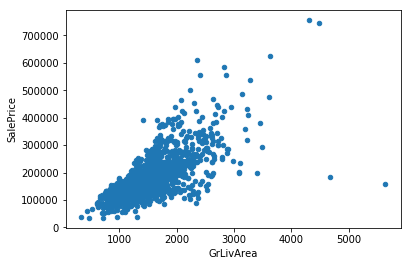

In [8]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

Looks like SalePrice has linear relationship with GrLivArea

Let's look at a categorical variable like OverallQual. This can be achieved by a boxplot.

(-0.5, 9.5, 0, 800000)

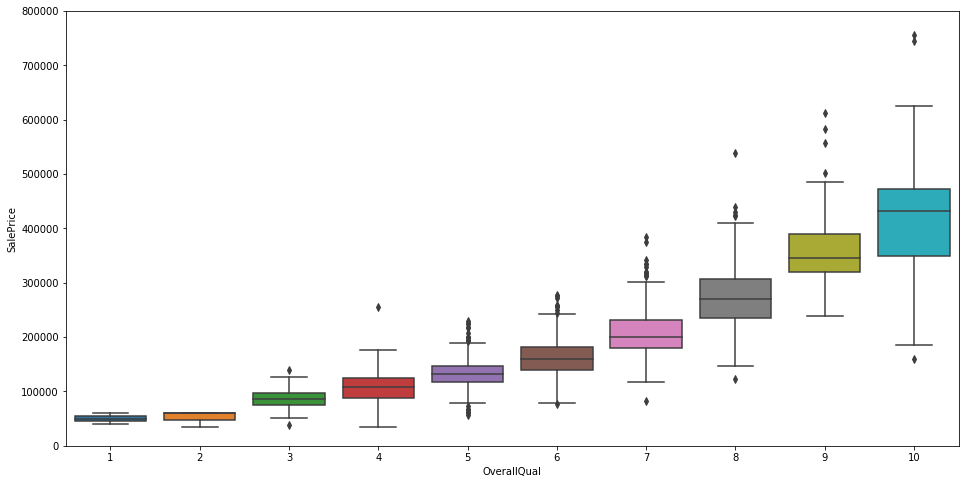

In [9]:
import matplotlib.pyplot as plt

data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(16,8))
fig = sb.boxplot(x = 'OverallQual', y = 'SalePrice', data= data)
fig.axis(ymin = 0, ymax = 800000)

Thus, as overall quality increases, sale price increases

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

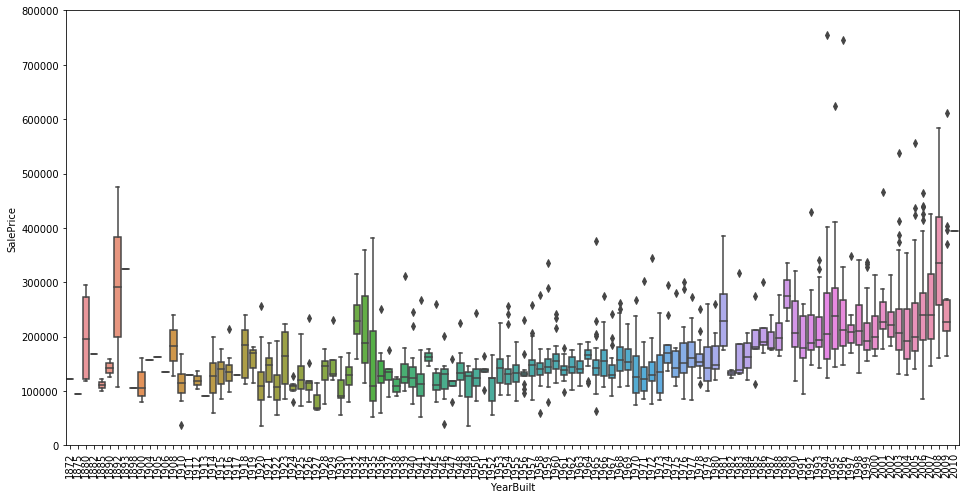

In [10]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize=(16,8))
fig = sb.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

Above plot shows there is no fixed year-wise trend in saleprice

However, since its not possible to perform such analysis on each variable, it is important to select variables from all. This method, called feature selection, can be performed by a correlation map between all variables.


In [11]:
corrData = train.corr()
maxData = (corrData[corrData != 1]).max()
minData = corrData.min()

minMaxData = pd.concat([maxData, minData], axis = 1).sort_values(by = 0, ascending = False)
print(minMaxData)

                      0         1
GarageArea     0.882475 -0.151521
GarageCars     0.882475 -0.185758
GarageYrBlt    0.825667 -0.324297
YearBuilt      0.825667 -0.387268
GrLivArea      0.825489 -0.079686
TotRmsAbvGrd   0.825489 -0.057583
TotalBsmtSF    0.819530 -0.238518
1stFlrSF       0.819530 -0.251758
SalePrice      0.790982 -0.135907
OverallQual    0.790982 -0.183882
2ndFlrSF       0.687501 -0.202646
BedroomAbvGr   0.676620 -0.150673
BsmtFinSF1     0.649212 -0.495251
BsmtFullBath   0.649212 -0.422900
YearRemodAdd   0.642277 -0.193919
FullBath       0.630012 -0.194149
HalfBath       0.609707 -0.119916
MasVnrArea     0.477493 -0.128101
Fireplaces     0.466929 -0.123936
LotFrontage    0.457181 -0.386347
LotArea        0.426095 -0.139781
BsmtUnfSF      0.415360 -0.495251
OpenPorchSF    0.330224 -0.093079
WoodDeckSF     0.324413 -0.125989
MSSubClass     0.307886 -0.386347
KitchenAbvGr   0.281721 -0.183882
PoolArea       0.206167 -0.059689
ScreenPorch    0.184530 -0.082864
BsmtFinSF2    

looking at the highest correlation values for each column, it can be seen that values range from -0.38 to 0.88

Lets plot a heatmap for these values

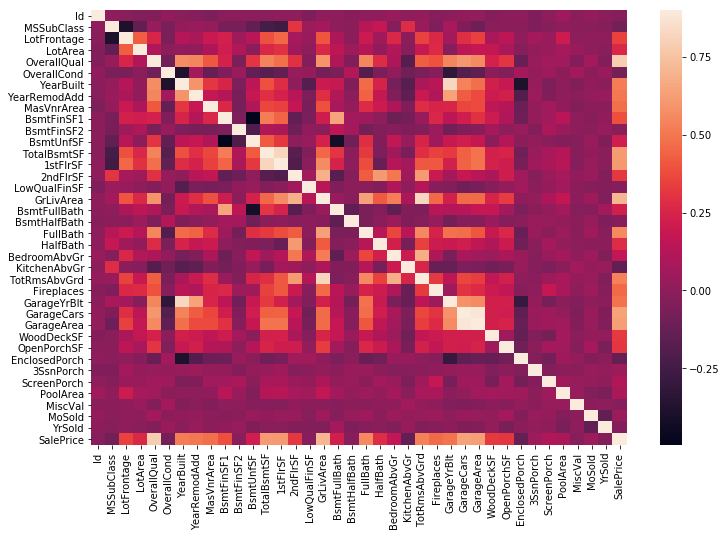

In [12]:
f, ax = plt.subplots(figsize = (12, 8))
sb.heatmap(corrData, vmax = 0.9)

Looking at the heatmap, some correlations stand out -
1. TotRmsAbvGrd and GrLivArea
2. YearBuilt and GarageYrBlt
3. SalePrice and GarageYrBlt
4. SecondFlrSF and GrLivArea

Considering what these variables indicates, it seems there is a collinearity in pairs 1, 2 and 4

Therefore, lets look at some lower level correlations
1. Full Bath and Year Built
2. Fireplaces and GrLivArea

Overall, it seems that variables affecting saleprice are GarageArea, GrLivArea, TotalBsmtSF and OverallQual. Lets look at these correlations with SalePrice

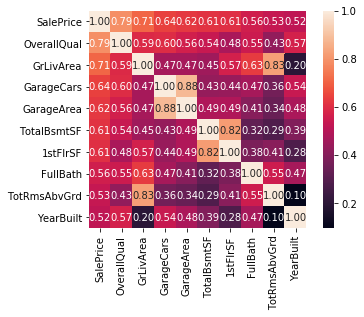

In [13]:
import numpy as np

var = 10
cols = corrData.nlargest(var, 'SalePrice')['SalePrice'].index
corrM = np.corrcoef(train[cols].values.T)
hm = sb.heatmap(corrM, annot = True, cbar = True, square = True, fmt='.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)

We can see that SalePrice is highly correlated with GrLivArea and OverallQual. GarageCars and GarageArea primarily denote the same thing. We can keep just one GarageCars.  Similarly, TotalBsmtSF and 1stFlrSF are possible multicollinearity situation. And then SalePrice is related to FullBath and YearBuilt.

We can now look at individual relationships with each of these.

[]

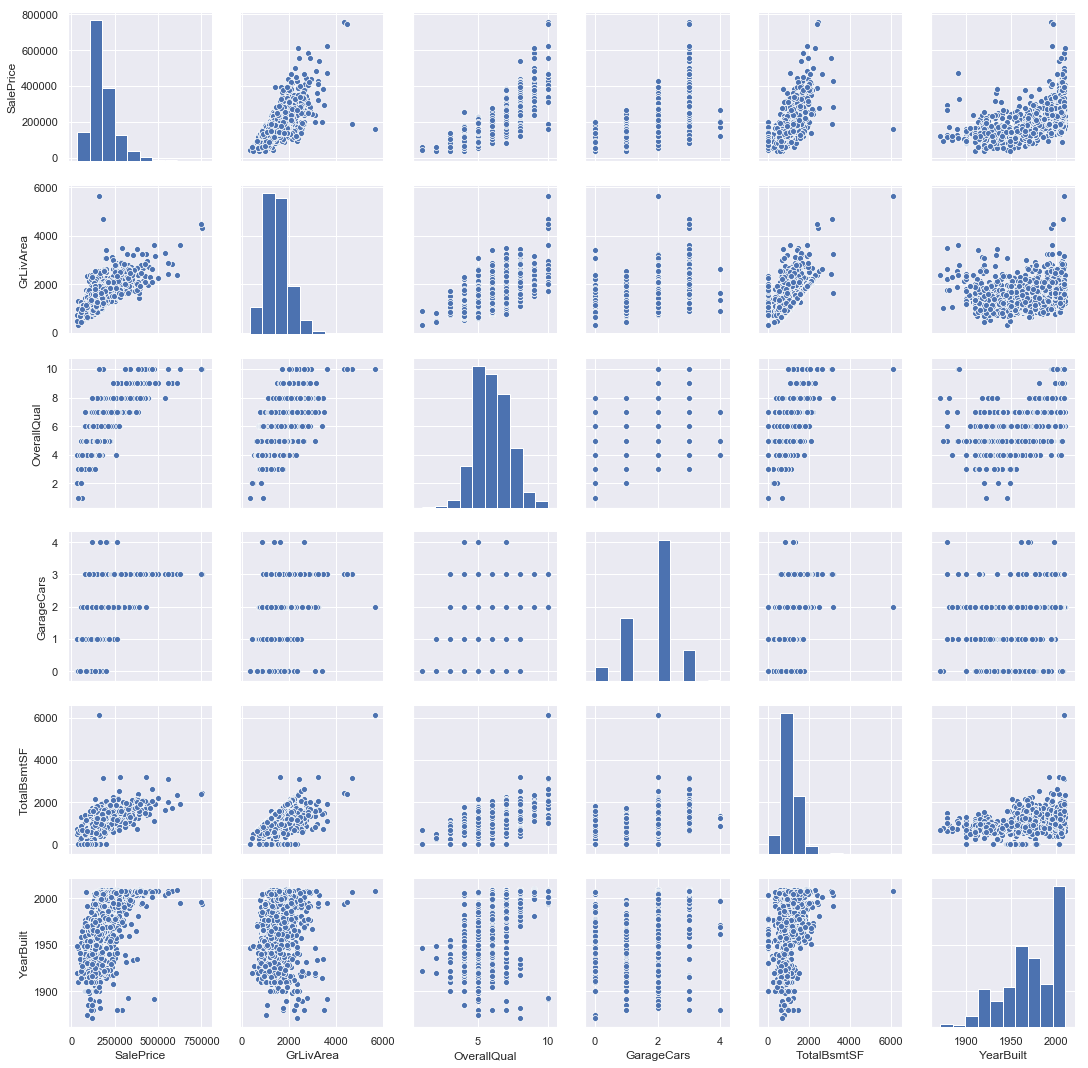

In [14]:
#cols = cols.drop(columns = ['GarageArea', '1stFlrSF', 'FullBath'])
cols = ['SalePrice','GrLivArea', 'OverallQual','GarageCars', 'TotalBsmtSF', 'YearBuilt']
sb.set()
sb.pairplot(train[cols], height = 2.5)
plt.plot()

These scatter plots help us gain various insights in data relationships.

Now let's move on to understanding missing data. First lets see how much data is missing in each columns. 

In [15]:
total = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum() > 0]
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False).head(19)
missingData = pd.concat([total, percent], axis = 1, keys = ['Count', 'Percent'])
print(missingData)

              Count   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685


As a generic thumb-rule, if more than 15% of data is missing, the missing variable should be deleted. In the above stats, more than 15% data is in variables, PoolQC, MiscFeature, Alley, Fence, FirplaceQu, LotFrontage. These variables do not significantly affect the sale price and do not add much value. Hence they can be safely deleted.

In [16]:
train = train.drop(['PoolQC', 'MiscFeature','Alley','Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)
train.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


All variables related to Garage have equal missing data. It can be assumed that same data rows are missing data for all variables. Also, since they contribute to only 5% of missing data, they can be deleted.

In [17]:
train = train.drop(['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageQual', 'GarageFinish'], axis = 1)
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Remaining two variables, MasVnrArea and MasVnrType are correlated with variables like GrLivArea and OverallQual, which are already taken into consideration. Hence both of these can be deleted as well

In [18]:
train = train.drop(['MasVnrArea', 'MasVnrType'], axis = 1)
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


The only remaining variables, 'Electrical' has a missing value for one record. Instead of deleting the variable, here only the record can be deleted.

In [19]:
index = train[train['Electrical'].isnull()].index
train = train.drop(index)
print(train['Electrical'].isnull().sum())

0


Now lets look at Outliers in data. The first thing is to identify the data which will be included in outliers. Therefore, the data needs to be first converted to standard form. This means data with mean 0 and standard deviation as 1.

SciKit library provides a function to do the same. Its called StandardScalar. I am using fit_tranform method of StandardScalar. np.newaxis adds a new dimension

In [20]:
from sklearn.preprocessing import StandardScaler
scaled_saleprice = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
scaled_saleprice

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

The saleprice variable is succesfully standardized

In [21]:
lowerRange = scaled_saleprice[scaled_saleprice[:,0].argsort()][:10]
higherRange = scaled_saleprice[scaled_saleprice[:,0].argsort()][-10:]

print('Distribution lower range', lowerRange)
print('Distribution higher range', higherRange)

Distribution lower range [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
Distribution higher range [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


The distribution varies approximately from -2 to 7. Lets plot these values to get a visual picture.

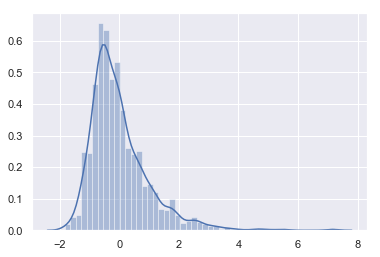

In [22]:
sb.distplot(scaled_saleprice)

This was univariate analysis. Now lets try to understand outliers from bivariate analysis.

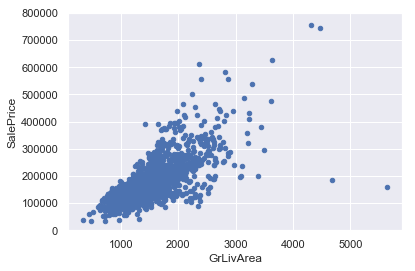

In [23]:
data = pd.concat([train['SalePrice'],train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000))

There are two observations from this plot -
1. Two points with low area but high price
2. Two points with large area but low price

The possible explanation for this is that observations from 1st maybe different type of land or exist at a very non-accomodable area. They do not follow general trend. Hence they can be categorized as outliers and should be deleted.

The other two points may be houses that are nearby commercial area, which increased their demand. They follow the overall house trend and will not be deleted.

In [24]:
outliers = train.sort_values(by='GrLivArea', ascending = False)[:2]
outliers
train.drop(train[train['Id'] == 1299].index)
train.drop(train[train['Id'] == 524].index)

train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


As we saw before, SalePrice shows peakedness and does not follow normal distribution. We will apply some data transformation to have normal distribution. This is achieved by logarithmic transformation (suggested for positive skewness)

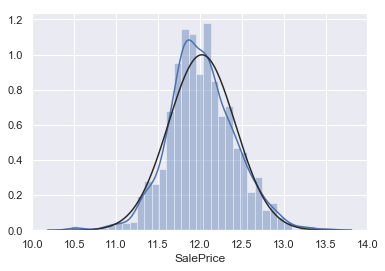

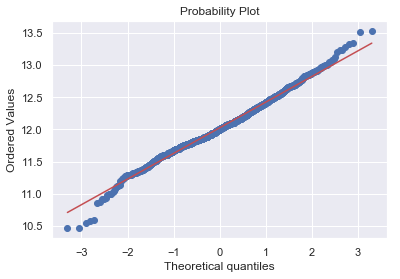

In [25]:
from scipy import stats 
from scipy.stats import norm

train['SalePrice'] = np.log(train['SalePrice'])
sb.distplot(train['SalePrice'], fit=norm)

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Now lets look at 'GrLivArea'

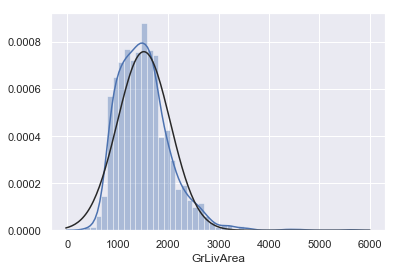

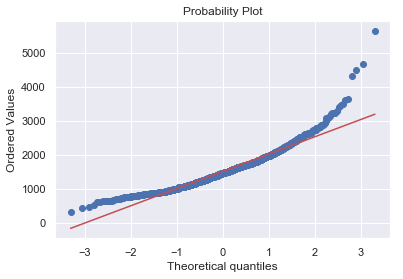

In [26]:
sb.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

Again positive skewness. Log transformation.

In [27]:
train['GrLivArea'] = np.log(train['GrLivArea'])

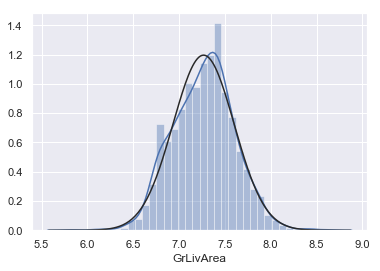

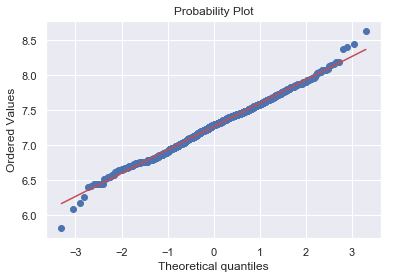

In [28]:
sb.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

Similarlt, for TotalBsmtSF

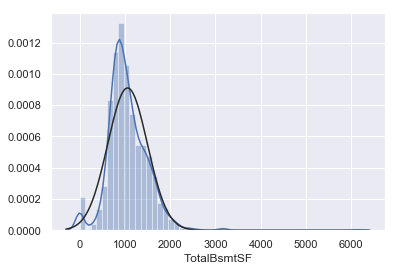

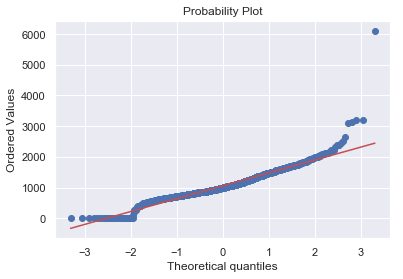

In [29]:
sb.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

For this variable, lets convert into a categorical variable that represents a boolean value denoting presence or absence of basement (0 means absent).

In [30]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

Apply log transformation to only those variables which have value not equal to 0

In [31]:
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

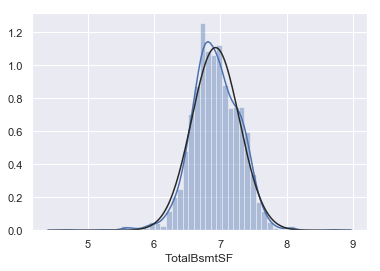

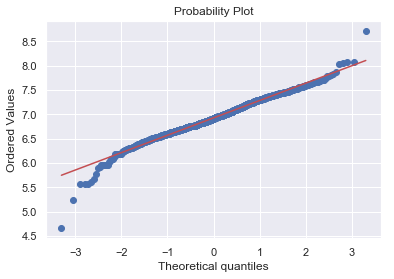

In [33]:
sb.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [42]:
train.shape

(1459, 247)

Lastly, lets convert categorical variables into dummy variables

In [36]:
train = pd.get_dummies(train)

In [41]:
train.shape

(1459, 247)

We see that many new columns have been added to data.

This is the end of data exploration topic